<img style="float:left" width="70%" src="pics/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="15%" src="pics/PythonLogo.svg">
<br style="clear:both;">


# *Practica 1 Wumpus*
### *Sistemas Inteligentes* (Curso 2024-2025)

## AUTOR
 
- Pablo Velasco Martín

## Docente

 - Pedro Latorre Carmona
 


## CODIGO:

## IMPORTS

voy a importar todas las librerias y recursos necesarios para el correcto funcionamiento de mi codigo.

In [1]:
from copy import deepcopy
from typing import Tuple, List
import random
import math
from IPython.display import display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import time
import os
from IPython.display import clear_output

import tkinter as tk
from PIL import ImageTk



## CLASE Tablerowumpus

Voy a crear la clase tablerowumpus la cual tendra todos los metodos que necesito para la creacion utilicacion y colocacion de personajes respectivos a los tableros

In [2]:
class Tablerowumpus:
   
    def __init__(self, matrix):
        self.setMatrix(matrix)
        
    def __eq__(self, other) -> bool:
        alto = len(self.matrix)
        ancho = len(self.matrix[0])
        
        for i in range(ancho):
            for j in range(alto):
                
                if(self.matrix[i][j]!= other.matrix[i][j]):
                    
                    return False
                
        return True

    def setMatrix(self, matrix):
        self.matrix = deepcopy(matrix)
    
    def getMatrix(self) -> List[List]:
        return deepcopy(self.matrix)
       
    
#--------------------------------- COLOCAR LOS PEROSNAJES Y RELLENAR EL TABLERO CON VECINOS --------------------------------------------------------
    
    def esVecino(self, OFila: int, OCol: int, fila: int, col: int):       #pasas dos cordenadas y me comprueba si son vecinos
                
        if fila == OFila - 1 and col == OCol:  # Arriba
            return True
        if fila ==  OFila + 1 and col == OCol:  # Abajo
            return True
        if fila ==  OFila and col == OCol - 1:  # Izquierda
            return True
        if fila ==  OFila and col == OCol + 1:  # Derecha
            return True
        
        return False
                
                
    def colocar(self):                # coloca todas las fichas y me comprueba que no esten alado del 1 o sobre otro numero
      
        self.matrix[5][0] = 1
        
        
        cORO = random.randint(0, 5)
        fORO = random.randint(0, 5)
                
        while self.esVecino(5, 0, cORO, fORO) or self.matrix[cORO][fORO] != 0:  #rotar los 5 ,0
            cWumpus = random.randint(0, 5)
            fWumpus = random.randint(0, 5)

        self.matrix[cORO][fORO] = 20
        
        cWumpus = random.randint(0, 5)
        fWumpus = random.randint(0, 5)
                
        while self.esVecino(5, 0, cWumpus, fWumpus) or self.matrix[cWumpus][fWumpus] != 0:  #rotar los 5 ,0
            cWumpus = random.randint(0, 5)
            fWumpus = random.randint(0, 5)

        self.matrix[cWumpus][fWumpus] = 30
        
        cHoyo1 = random.randint(0, 5)
        fHoyo1 = random.randint(0, 5)
                
        while self.esVecino(5, 0, cHoyo1, fHoyo1) or self.matrix[cHoyo1][fHoyo1] != 0:
            cHoyo1 = random.randint(0, 5)
            fHoyo1 = random.randint(0, 5)


        self.matrix[cHoyo1][fHoyo1] = 40
                
        cHoyo2 = random.randint(0, 5)
        fHoyo2 = random.randint(0, 5)
                
        while self.esVecino(5, 0, cHoyo2, fHoyo2) or self.matrix[cHoyo2][fHoyo2] != 0:
            cHoyo2 = random.randint(0, 5)
            fHoyo2 = random.randint(0, 5)


        self.matrix[cHoyo2][fHoyo2] = 50
        
        return self.matrix
    
                          
    def enTablero(self, fila: int, col: int):           #me dice si esta en los limites del tablero
        
        if fila >= 0 and fila < 6:
            if col >= 0 and col < 6:
                return True  
        return False
        
                         
    def vecinos(self):          #coge al wumpus y a los hojos y crea sus casillas contiguas siemrpre que esten dentro de tablero y sean 0
        
        for i in range(6):
            for j in range(6):
           
                if self.matrix[i][j] == 30:  # encontramos al wumpus
        
                    if self.enTablero(i - 1, j):          #vecino arriba wum
                
                        if self.matrix[i - 1][j] == 0:
                            self.matrix[i - 1][j] = 60
                
                        if self.matrix[i - 1][j] == 70:
                            self.matrix[i - 1][j] = 80

                   
                    if self.enTablero(i + 1, j):           #vecino abajo wum
                
                        if self.matrix[i + 1][j] == 0:
                            self.matrix[i + 1][j] = 60
                
                        if self.matrix[i + 1][j] == 70:
                            self.matrix[i + 1][j] = 80

                   
                    if self.enTablero(i, j - 1):           #  vecino izquierda wum
                
                        if self.matrix[i][j - 1] == 0:
                            self.matrix[i][j - 1] = 60
                
                        if self.matrix[i][j - 1] == 70:
                            self.matrix[i][j - 1] = 80

                    
                    if self.enTablero(i, j + 1):            # vecino  Derecha wum
                
                        if self.matrix[i][j + 1] == 0:
                            self.matrix[i][j + 1] = 60
                
                        if self.matrix[i][j + 1] == 70:
                            self.matrix[i][j + 1] = 80
                

                elif self.matrix[i][j] == 40 or self.matrix[i][j] == 50:  # Encontramos un hoyo 
                   

                    if self.enTablero(i - 1, j):           #vecino arriba wum
                
                        if self.matrix[i - 1][j] == 0:
                            self.matrix[i - 1][j] = 70
                
                        if self.matrix[i - 1][j] == 60 :
                            self.matrix[i - 1][j] = 80

                
                    if self.enTablero(i + 1, j):             #vecino abajo hoyo
                
                        if self.matrix[i + 1][j] == 0:
                            self.matrix[i + 1][j] = 70
                
                        if self.matrix[i + 1][j] == 60:
                            self.matrix[i + 1][j] = 80

               
                    if self.enTablero(i, j - 1):             #vecino izquierda hoyo
                
                        if self.matrix[i][j - 1] == 0:
                            self.matrix[i][j - 1] = 70
                
                        if self.matrix[i][j - 1]== 60:
                            self.matrix[i][j - 1] = 80

            
                    if self.enTablero(i, j + 1):          #vecino derecha hoyo 
                
                        if self.matrix[i][j + 1] == 0:
                            self.matrix[i][j + 1] = 70
                
                        if self.matrix[i][j + 1]== 60:
                            self.matrix[i][j + 1] = 80
                            
                    
            
        return self.matrix 
    
    
    def limpiarVecinos(self):               #barre la matriz y me elimina toods los vecinos que hay en ese instante del tablero
        
        for i in range(len(self.matrix)):
            for j in range(len(self.matrix[i])):
                
                # Si el valor es 60, 70 o 80, lo sustituimos por 0
                if self.matrix[i][j] in [60, 70, 80]:
                    self.matrix[i][j] = 0
    
    
#---------------------------------------------MOVIMIENTOS DISPONIBLES ------------------------------------------------------------
    
    
    def canMoveUp(self, row: int, col: int) -> bool:      #comprueba si el moviento esta dentro del limite superior del tablero
        
        if row > 0 :
            return True
        else:
            return False
    

    def canMoveDown(self, row: int, col: int) -> bool:  #comprueba si el moviento esta dentro del limite inferior del tablero
        
        if row < len(self.matrix) - 1 :
            return True
        else:
            return False
    
    def canMoveLeft(self, row: int, col: int) -> bool:   #comprueba si el moviento esta dentro del limite izquierdo del tablero
        
        if col > 0 :
            return True
        else:
            return False
        

    def canMoveRight(self, row: int, col: int) -> bool:   #comprueba si el moviento esta dentro del limite derecho del tablero
     
        if col < len(self.matrix) - 1 :
            return True
        else:
            return False
  
 #----------------------------------sacar los movimientos disponibles de max y min----------------------------------------------

    
    def getAvailableMovesForMax(self, row: int, col: int) -> List[int]:   #me da como return los movimientos posibles que puede hacer el agente
        
        moves = []

        if self.canMoveUp(row,col):            
            
            moves.append(1)
        
        if self.canMoveRight(row,col):            
            
            moves.append(2)
        
        if self.canMoveDown(row,col):
            
            moves.append(3)
        
         
        if self.canMoveLeft(row,col):
            
            moves.append(4)
             
        return moves
    
    
    def getAvailableMovesForMin(self,num) -> List[Tuple[int]]:  #me da como return los movimientos posibles qu epuede hace un hoyo
        
        places = []
      
        for i in range(6):
            for j in range(6):
                if self.matrix[i][j] == num:
                    
                    # Arriba
                    if i > 0 and self.matrix[i - 1][j] in (0, 60, 70, 80): 
                        places.append((i - 1, j))

                    # Abajo
                    if i < 5 and self.matrix[i + 1][j] in (0, 60, 70, 80):
                        places.append((i + 1, j))

                    # Izquierda
                    if j > 0 and self.matrix[i][j - 1] in (0, 60, 70, 80):
                        places.append((i, j - 1))

                    # Derecha
                    if j < 5 and self.matrix[i][j + 1] in (0, 60, 70, 80):
                        places.append((i, j + 1))

        return places

#--------------------------------------------Ejecucion de esos movimientos-------------------------------------------------------
    
    
    def up (self,row: int, col: int):          # me ejecuta el movimiento hacia arriba del agente 
        
        if self.matrix[row-1][col] == 0 and self.matrix[row][col] == 1 :    #caso agente se mueve a casilla vacia
        
            anterior = self.matrix[row][col]
            nuevo = self.matrix[row-1][col]
            
            self.matrix[row-1][col] =anterior
            self.matrix[row][col] = nuevo
            
        elif self.matrix[row][col] == 1 and (self.matrix[row-1][col] == 80 or 70 or 60 or 50 or 40 or 30 or 20):  #caso agente se mueve a personaje 
            
            anterior = self.matrix[row][col]
            nuevo = self.matrix[row-1][col]
           
            self.matrix[row-1][col] = anterior + nuevo
            self.matrix[row][col] =0
        
        elif (self.matrix[row][col] == 81 or 71 or 61 or 51 or 41 or 31 or 21) and self.matrix [row-1][col]==0:  #caso agnte se mueve de personaje a casilla vacia 
          
            anterior = self.matrix[row][col]
            nuevo = self.matrix[row-1][col]
        
            self.matrix[row-1][col] = 1
            self.matrix[row][col] = anterior-1
            
            
        elif (self.matrix[row][col]== 81 or 71 or 61 or 51 or 41 or 31 or 21) and (self.matrix [row-1][col] == 80 or 70 or 60 or 50 or 40 or 30 or 20):  # caso agente se mueve de personaje a personaje
            
            anterior = self.matrix[row][col]
            nuevo = self.matrix[row-1][col]
           
            self.matrix[row-1][col]= nuevo + 1
            self.matrix[row][col]= anterior -  1
            
    
    def down (self,row: int, col: int):      # me ejecuta el movimiento hacia arriba del agente 
       
        if self.matrix[row+1][col] == 0 and self.matrix[row][col] == 1 :
        
            anterior = self.matrix[row][col]
            nuevo = self.matrix[row+1][col]
            
            self.matrix[row+1][col] =anterior
            self.matrix[row][col] = nuevo
            
        elif self.matrix[row][col] == 1 and (self.matrix[row+1][col] == 80 or 70 or 60 or 50 or 40 or 30 or 20):
            
            anterior = self.matrix[row][col]
            nuevo = self.matrix[row+1][col]
           
            self.matrix[row+1][col] = anterior + nuevo
            self.matrix[row][col] =0
        
        elif (self.matrix[row][col] == 81 or 71 or 61 or 51 or 41 or 31 or 21) and self.matrix [row+1][col]==0:
          
            anterior = self.matrix[row][col]
            nuevo = self.matrix[row+1][col]
        
            self.matrix[row+1][col] = 1
            self.matrix[row][col] = anterior-1
            
            
        elif (self.matrix[row][col]== 81 or 71 or 61 or 51 or 41 or 31 or 21) and (self.matrix [row+1][col] == 80 or 70 or 60 or 50 or 40 or 30 or 20):
            
            anterior = self.matrix[row][col]
            nuevo = self.matrix[row+1][col]
           
            self.matrix[row+1][col]= nuevo + 1
            self.matrix[row][col]= anterior -  1
            

    def left (self,row: int, col: int):       # me ejecuta el movimiento hacia arriba del agente 
       
        if self.matrix[row][col-1] == 0 and self.matrix[row][col] == 1 :
        
            anterior = self.matrix[row][col]
            nuevo = self.matrix[row][col-1]
            
            self.matrix[row][col-1] =anterior
            self.matrix[row][col] = nuevo
            
        elif self.matrix[row][col] == 1 and (self.matrix[row][col-1] == 80 or 70 or 60 or 50 or 40 or 30 or 20):
            
            anterior = self.matrix[row][col]
            nuevo = self.matrix[row][col-1]
           
            self.matrix[row][col-1] = anterior + nuevo
            self.matrix[row][col] =0
        
        elif (self.matrix[row][col] == 81 or 71 or 61 or 51 or 41 or 31 or 21) and self.matrix [row][col-1]==0:
          
            anterior = self.matrix[row][col]
            nuevo = self.matrix[row][col-1]
        
            self.matrix[row][col-1] = 1
            self.matrix[row][col] = anterior-1
            
            
        elif (self.matrix[row][col]== 81 or 71 or 61 or 51 or 41 or 31 or 21) and (self.matrix [row][col-1] == 80 or 70 or 60 or 50 or 40 or 30 or 20):
            
            anterior = self.matrix[row][col]
            nuevo = self.matrix[row][col-1]
           
            self.matrix[row][col-1]= nuevo + 1
            self.matrix[row][col]= anterior -  1
            

    def right (self,row: int, col: int):     # me ejecuta el movimiento hacia arriba del agente 
       
        if self.matrix[row][col+1] == 0 and self.matrix[row][col] == 1 :
        
            anterior = self.matrix[row][col]
            nuevo = self.matrix[row][col+1]
            
            self.matrix[row][col+1] =anterior
            self.matrix[row][col] = nuevo
            
        elif self.matrix[row][col] == 1 and (self.matrix[row][col+1] == 80 or 70 or 60 or 50 or 40 or 30 or 20):
            
            anterior = self.matrix[row][col]
            nuevo = self.matrix[row][col+1]
           
            self.matrix[row][col+1] = anterior + nuevo
            self.matrix[row][col] =0
        
        elif (self.matrix[row][col] == 81 or 71 or 61 or 51 or 41 or 31 or 21) and self.matrix [row][col+1]==0:
          
            anterior = self.matrix[row][col]
            nuevo = self.matrix[row][col+1]
        
            self.matrix[row][col+1] = 1
            self.matrix[row][col] = anterior-1
            
            
        elif (self.matrix[row][col]== 81 or 71 or 61 or 51 or 41 or 31 or 21) and (self.matrix [row][col+1] == 80 or 70 or 60 or 50 or 40 or 30 or 20):
            
            anterior = self.matrix[row][col]
            nuevo = self.matrix[row][col+1]
           
            self.matrix[row][col+1]= nuevo + 1
            self.matrix[row][col]= anterior -  1
            
            
#----------------------------------------------- funcion de utilidad -------------------------------------------------------------
    
    def utility(self) -> float:
      
        posAgente = None
        posOro = None
    
        alto = len(self.matrix)
        ancho = len(self.matrix[0])
    
        for i in range(alto):
            for j in range(ancho):
                if self.matrix[i][j] == 20 or self.matrix[i][j] == 21:
                    posOro = [i, j]
                if self.matrix[i][j] in [1, 21, 31, 41, 51, 61, 71, 81]:  
                    posAgente = [i, j]
        
      
        
        distanciaCol = abs(posAgente[1] - posOro[1]) 
        distanciaFila = abs(posOro[0] - posAgente[0])
        distancia = 1 / ((distanciaFila + distanciaCol) + 0.01)
    
        
        util = distancia * 100
        
        
        if util == 0: 
            return 1  

        
        for i in range(alto):
            for j in range(ancho):
                if self.matrix[i][j] == 31:              #si cae en wumpus
                    util -= 100
                elif self.matrix[i][j] in (41, 51):      # si cae en hoyo
                    util -= 50
                elif self.matrix[i][j] in (61, 71, 81):  #si cae en brisa o edor
                    util -= 10
                elif self.matrix[i][j] == 21:            # si cae en oro
                    util += 100
                
        return util

#-------------------------------------------------- GAME OVER-----------------------------------------------------------------------
    
    def isGameOver(self) -> bool:
        
        for fila in self.matrix:
            for numero in fila:
                
                if numero == 31:
                    return True
                    break
                elif numero == 21:
                    return True
                    break
            
        return False
        
        
#--------------------------- Creacion de los tableros hijos para max y para min ------------------------------------------------------- 
        
    def tablerosSiguientesMAX(self):        # me saca los tablero sucesores posibles de max es decir los sucesores en los q el agnte se mueve
        
        successorMatricesMAX = []
    
        for i in range(6) :
            for j in range(6): 
                if self.matrix[i][j] in [1,21,31,41,51,61,71,81]:
                    posAJ = [i, j]
    
        availableMoves = self.getAvailableMovesForMax(posAJ[0],posAJ[1])
        
        for i in range(len(availableMoves)):  
            
            move = availableMoves[i]  
        
            successorBoard = deepcopy(self)  
           
            if move == 1:  # Mover arriba
                successorBoard.up(posAJ[0],posAJ[1])
                
            elif move == 2:  # Mover derecha
                successorBoard.right(posAJ[0],posAJ[1])
                
            elif move == 3:  # Mover abajo
                successorBoard.down(posAJ[0],posAJ[1])
                
            elif move == 4:  # Mover izquierda
                successorBoard.left(posAJ[0],posAJ[1])
                
            successorMatricesMAX.append(successorBoard)
            
          
        return successorMatricesMAX
        

    def tablerosSiguientesMIN (self):     # me saca los tableros sucesores de min
        
        successorMatricesMIN = []

        HoyoMove = random.choice([40, 50])  # elige el hoyo aleatorio a mover
        
        for i in range(6):
            for j in range(6): 
                if self.matrix [i][j] == HoyoMove:
                    filaHoyo=i
                    colHoyo=j
        
        availableMoves = self.getAvailableMovesForMin(HoyoMove)  
       
        for move in availableMoves:
            
            successorBoard = deepcopy(self)
            
            fil, col = move
            
            if fil == filaHoyo - 1 and col == colHoyo:
           
                successorBoard.matrix[filaHoyo][colHoyo]=0
                successorBoard.matrix[filaHoyo-1][colHoyo]= HoyoMove
                successorBoard.limpiarVecinos()
                successorBoard.vecinos()
                
            elif fil == filaHoyo + 1 and col  == colHoyo:
            
                successorBoard.matrix[filaHoyo][colHoyo]=0
                successorBoard.matrix[filaHoyo+1][colHoyo]= HoyoMove
                successorBoard.limpiarVecinos()
                successorBoard.vecinos()
            
            elif fil ==  filaHoyo and col == colHoyo - 1:
           
                successorBoard.matrix[filaHoyo][colHoyo]=0
                successorBoard.matrix[filaHoyo][colHoyo-1]= HoyoMove
                successorBoard.limpiarVecinos()
                successorBoard.vecinos()
            
            elif fil == filaHoyo and col == colHoyo + 1:
            
                successorBoard.matrix[filaHoyo][colHoyo]=0
                successorBoard.matrix[filaHoyo][colHoyo+1]= HoyoMove
                successorBoard.limpiarVecinos()
                successorBoard.vecinos()
        
            successorMatricesMIN.append(successorBoard)
            
            
            
        return successorMatricesMIN
    
#----------------------------------------------------Accion jugador 2 mover hoyo-------------------------------------------------- 

    def moverHoyo(self):        # me va a mover un hoyo aleatoriamente a una posicion posible aleatoria cuando le toque al jugador 2

        HoyoMove = random.choice([40, 50])
        
        for i in range(6):
            for j in range(6): 
                if self.matrix [i][j] == HoyoMove:
                    filaHoyo=i
                    colHoyo=j
        
        availableMoves = self.getAvailableMovesForMin(HoyoMove)

        tableroJ2 = deepcopy(self)
        
        if availableMoves:
        
            fil, col = availableMoves[0]

            if fil == filaHoyo - 1 and col == colHoyo:

                    tableroJ2.matrix[filaHoyo][colHoyo]=0
                    tableroJ2.matrix[filaHoyo-1][colHoyo]= HoyoMove
                    tableroJ2.limpiarVecinos()
                    tableroJ2.vecinos()

            elif fil == filaHoyo + 1 and col  == colHoyo:

                tableroJ2.matrix[filaHoyo][colHoyo]=0
                tableroJ2.matrix[filaHoyo+1][colHoyo]= HoyoMove
                tableroJ2.limpiarVecinos()
                tableroJ2.vecinos()

            elif fil ==  filaHoyo and col == colHoyo - 1:

                tableroJ2.matrix [filaHoyo][colHoyo]=0
                tableroJ2.matrix[filaHoyo][colHoyo-1]= HoyoMove
                tableroJ2.limpiarVecinos()
                tableroJ2.vecinos()

            elif fil == filaHoyo and col == colHoyo + 1:

                tableroJ2.matrix[filaHoyo][colHoyo]=0
                tableroJ2.matrix[filaHoyo][colHoyo+1]= HoyoMove
                tableroJ2.limpiarVecinos()
                tableroJ2.vecinos()
        
        
        return tableroJ2
    
#--------------------------------------------------- DISPARO DEL AGENTE ------------------------------------------------------------------

    def disparo_aleatorio(self):
      
        for i in range(6):
            for j in range(6):
                
                if self.matrix[i][j] in [1,21,31,41,51,61,71,81]:
                    posAJ = (i, j)

        direccion = random.choice([1,2,3,4]) 
        
        tableros_disparo = []
        
        fila, col = posAJ

      
        if direccion == 1:  # Disparo hacia arriba
            while fila > 0:
                tablero_modificado = deepcopy(self)  
                tablero_modificado.matrix[fila - 1][col] += 2  
                tableros_disparo.append(tablero_modificado)  
                fila -= 1 

        elif direccion == 2:  # Disparo hacia la derecha
            while col < 5:
                tablero_modificado = deepcopy(self)  
                tablero_modificado.matrix[fila][col + 1] += 2  
                tableros_disparo.append(tablero_modificado)  
                col += 1  

        elif direccion == 3:  # Disparo hacia abajo
            while fila < 5:
                tablero_modificado = deepcopy(self)  
                tablero_modificado.matrix[fila + 1][col] += 2  
                tableros_disparo.append(tablero_modificado)  
                fila += 1  

        elif direccion == 4:  # Disparo hacia la izquierda
            while col > 0:
                tablero_modificado = deepcopy(self)  
                tablero_modificado.matrix[fila][col - 1] += 2  
                tableros_disparo.append(tablero_modificado)  
                col -= 1  

        return tableros_disparo 

## Función asociada al método *Minimax* (con poda $\alpha-\beta$)

In [3]:
def miniMax(state:Tablerowumpus, currentLevel:int, maxLevel:int, player:int, alpha:int, beta:int, stop:bool) -> Tuple[Tablerowumpus, int, bool]:

    matriz = state.getMatrix()
    successorMatrices = []
    
    if (currentLevel == maxLevel):                                         
        return (state ,state.utility(),stop)  
        
    successorMatricesMAX = state.tablerosSiguientesMAX() #saco las matrices sucesoras de min y max
    successorMatricesMIN = state.tablerosSiguientesMIN()
    
    if len(successorMatricesMAX and successorMatricesMIN) == 0:
        stopDigging = True
        coste=state.utility()
        
        return (state,coste,stopDigging)
    
    bestMatrix = None                              #variables para el mejor estado y el mejor valor de utilidad
    best=0    
      
    if player == 2:                                # player max voy a sacar sus sucesores y llamo recursivo                  
        maxValue = -math.inf #alpha
        
        for i in range(0, len(successorMatricesMAX)):
            
            successor = successorMatricesMAX[i]
            matrizS,utility,Stop = miniMax(successor, currentLevel + 1, maxLevel, 1, alpha, beta, stop)
            best = utility
            
            if best > maxValue:                #Si encontra un valor mejor actualiza maxValue y el mejor estado             
                maxValue = best
                bestMatrix = successor
                alpha = max(alpha, best)                #actualizo alpha poda alpha-beta
                if best >= beta:                        #poda
                                           
                    return (matrizS,best,stop)         
                   
    else:                                         # player min voy a sacar sus sucesores y llamo recursivo        
        
        minValue = math.inf 
        
        for i in range(0, len(successorMatricesMIN)):
            
            successor = successorMatricesMIN[i]
            
            matrizS, utility, stopIndicator = miniMax(successor, currentLevel + 1, maxLevel, 2, alpha, beta, stop)
  
            if utility < minValue:
                
                minValue = utility
                bestMatrix = successor
                
            beta = min(beta, utility)           # actualizo beta para la poda alpha-beta
            if utility <= alpha:                #poda   
                
                   return (matrizS,utility,stop)        
            
    return (bestMatrix,utility,stop)


## Poner en funcionamiento Minimax


In [4]:
def iniciarMinimax(tablero: Tablerowumpus, maxLevel: int) -> Tuple[Tablerowumpus, int, bool]:
    
    currentLevel = 0     
    player = 2            
    alpha = -math.inf     
    beta = math.inf       
    stop = False        
    
    bestMove, utility, stop = miniMax(tablero, currentLevel, maxLevel, player, alpha, beta, stop)
    
    return bestMove, utility, stop


## IMPRIMIR LOS RESULTADOS POR PANTALLA (VISTA DEL JUEGO)


In [5]:
image_paths = {
    "0": "./ImagenesCasillasWumpus/CasillaVacia.png",
    "1": "./ImagenesCasillasWumpus/Agente.png",
    "2": "./ImagenesCasillasWumpus/Bala.png",
    "30": "./ImagenesCasillasWumpus/Wumpus.png",
    "32": "./ImagenesCasillasWumpus/AgenteWumpu.png",
    "60": "./ImagenesCasillasWumpus/Edor.png",
    "20": "./ImagenesCasillasWumpus/Oro.png",
    "70": "./ImagenesCasillasWumpus/Brisa.png",
    "40": "./ImagenesCasillasWumpus/Hoyo.png",
    "50": "./ImagenesCasillasWumpus/Hoyo.png",
    "80": "./ImagenesCasillasWumpus/EdorBrisa.png",
    "21": "./ImagenesCasillasWumpus/AgenteOro.png",
    "31": "./ImagenesCasillasWumpus/AgenteWumpu.png",
    "41": "./ImagenesCasillasWumpus/AgenteHoyo.png",
    "51": "./ImagenesCasillasWumpus/AgenteHoyo.png",
    "71": "./ImagenesCasillasWumpus/AgenteBrisa.png",
    "61": "./ImagenesCasillasWumpus/AgenteEdor.png",
    "81": "./ImagenesCasillasWumpus/AgenteEdorBrisa.png",
    "22": "./ImagenesCasillasWumpus/OroBala.png",
    "42": "./ImagenesCasillasWumpus/HoyoBala.png",
    "52": "./ImagenesCasillasWumpus/HoyoBala.png",
    "72": "./ImagenesCasillasWumpus/BrisaBala.png",
    "62": "./ImagenesCasillasWumpus/EdorBala.png",
    "82": "./ImagenesCasillasWumpus/EdorBrisaBala.png", 
}


def obtener_imagen_redimensionada(numero, tamaño=(50, 50)):
    

    img_path = image_paths.get(str(numero))
    if img_path:
        with Image.open(img_path) as img:
            img_resized = img.resize(tamaño)
            return np.array(img_resized)  
    else:
        print(f"No se encontró imagen para el número {numero}")
        return np.zeros((*tamaño, 3), dtype=np.uint8) 
        

def imprimir_tablero_con_imagenes(matriz, tamaño=(50, 50)):
    fig, ax = plt.subplots(6, 6, figsize=(8, 8))
    fig.subplots_adjust(hspace=0.1, wspace=0.1)

    for i in range(6):
        for j in range(6):
            numero = matriz.matrix[i][j]
            imagen = obtener_imagen_redimensionada(numero, tamaño)
            ax[i, j].imshow(imagen)
            ax[i, j].axis('off')  

    plt.show()
    
    
def mostrar_Juego(todos_los_estados):
     
    for tablero in todos_los_estados:
            
        imprimir_tablero_con_imagenes(tablero)
            
        time.sleep(0.5)
        clear_output(wait=True) 

## INICIALIZACION DEL TABLERO Y BEGIN DEL JUEGO (MAIN)

En esta celda inicializamos el tablero y llamamos a los metodos y funciones que hacen que se genere el tablero completo y se juege la partida se podria decir que es como mi metodo main

!!!!!! HAS GANADO LA PARTIDA !!!!!!
------------------------------ AQUI TIENES LA PARTIDA JUGADA ----------------------------


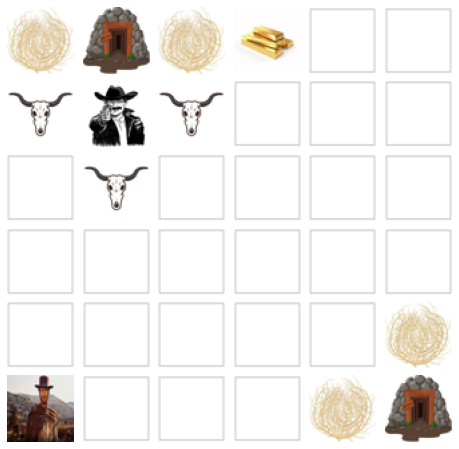

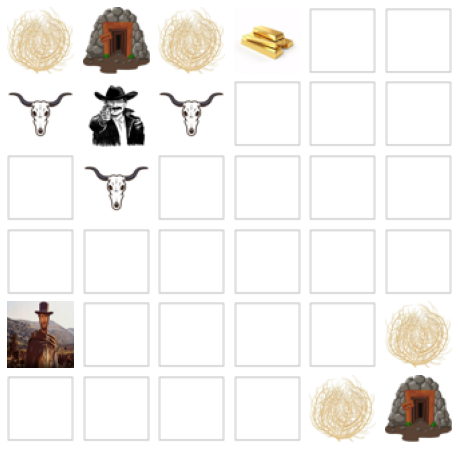

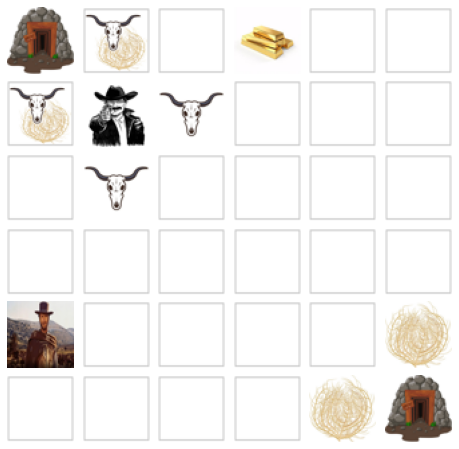

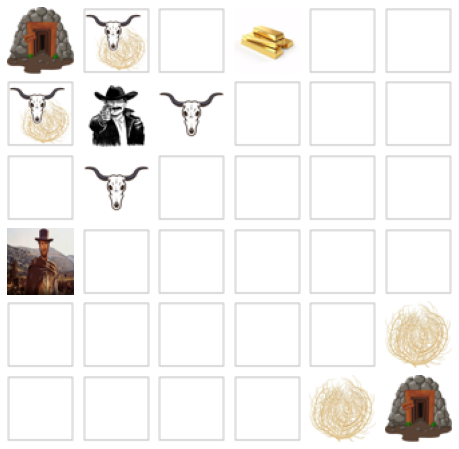

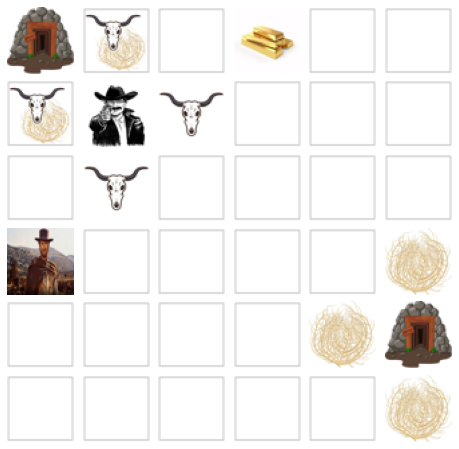

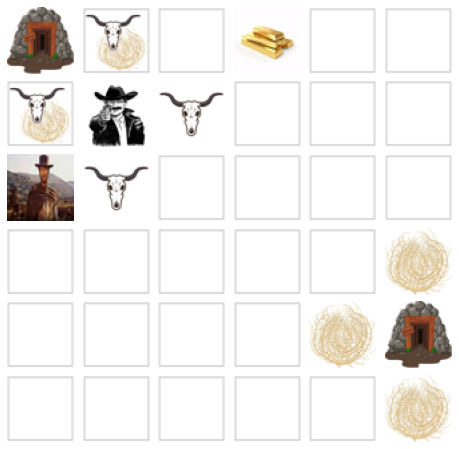

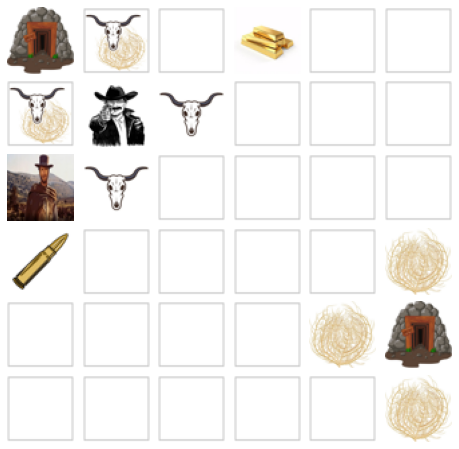

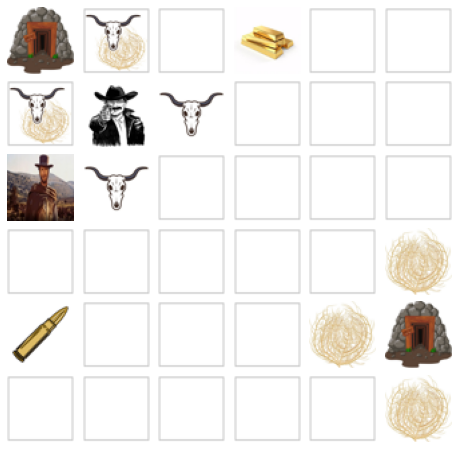

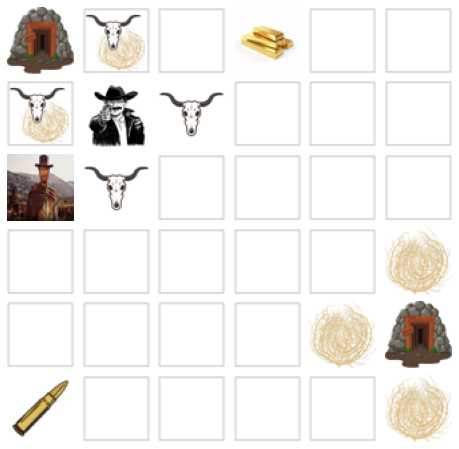

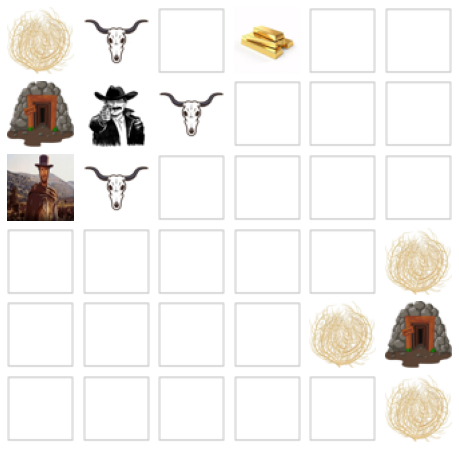

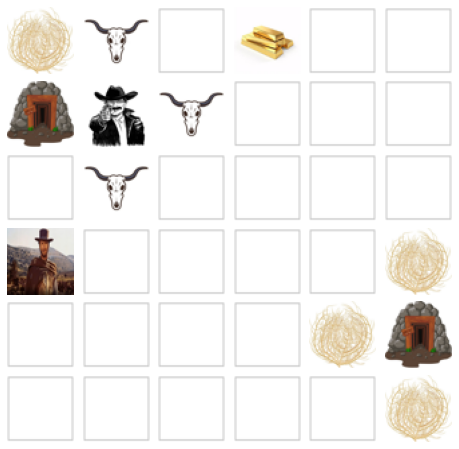

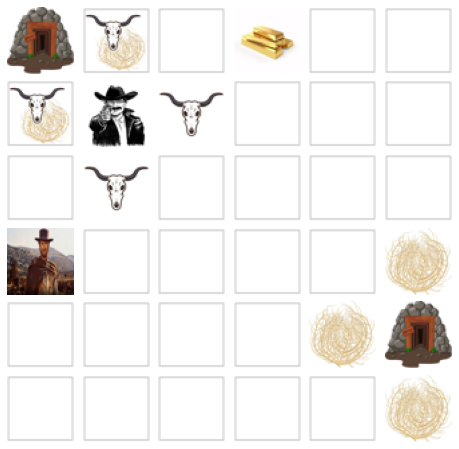

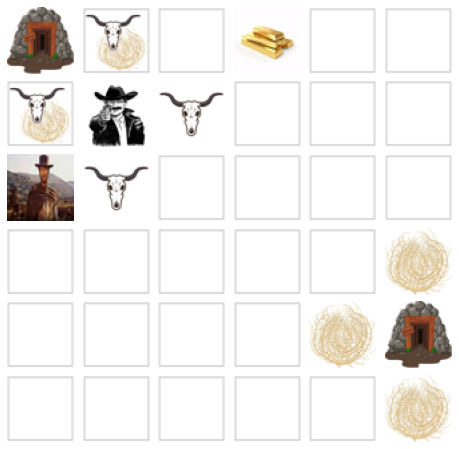

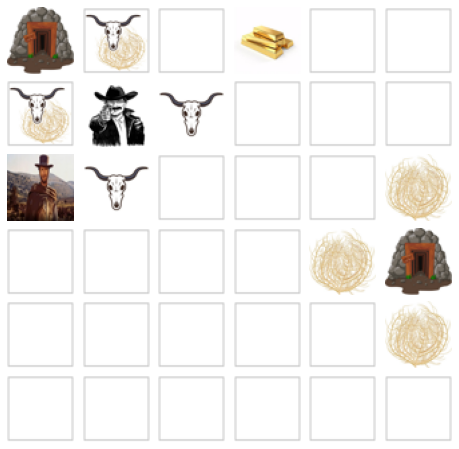

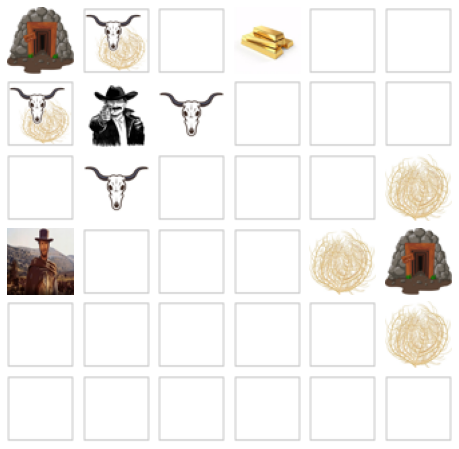

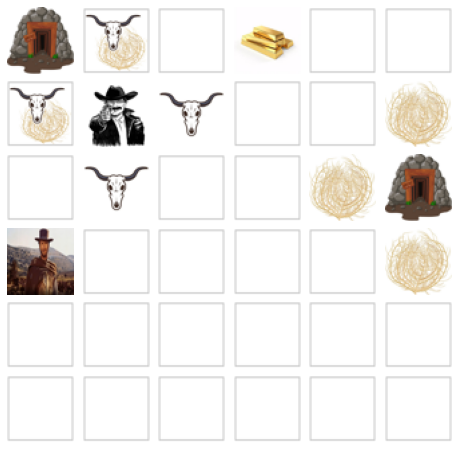

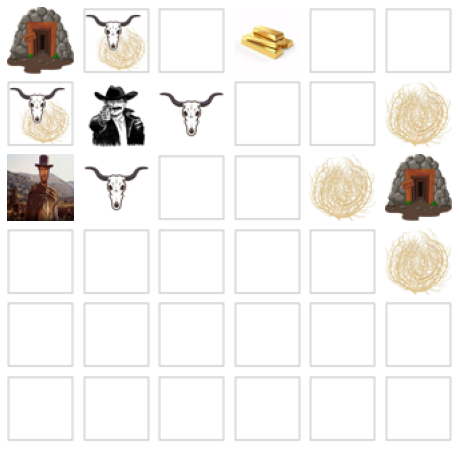

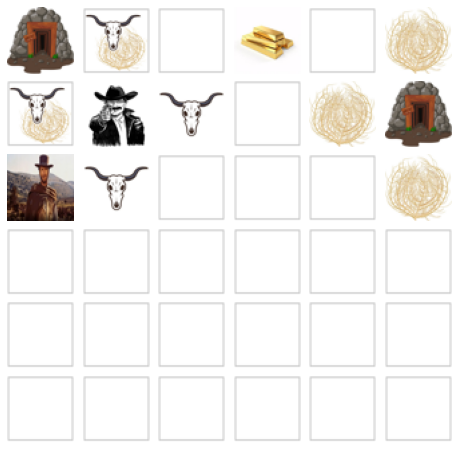

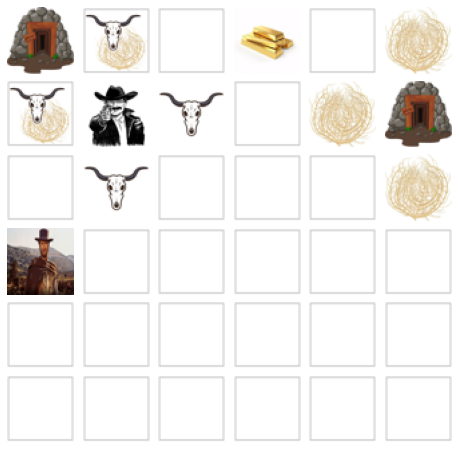

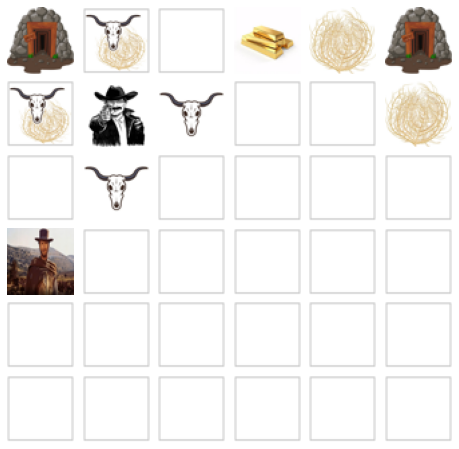

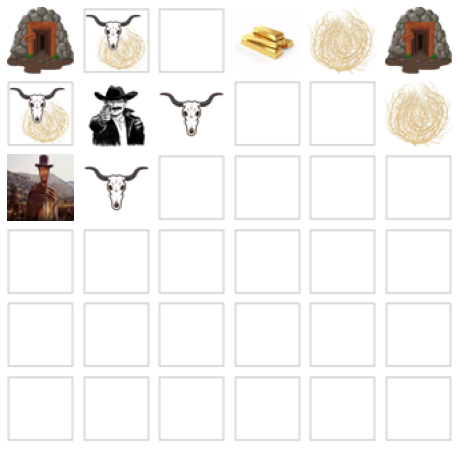

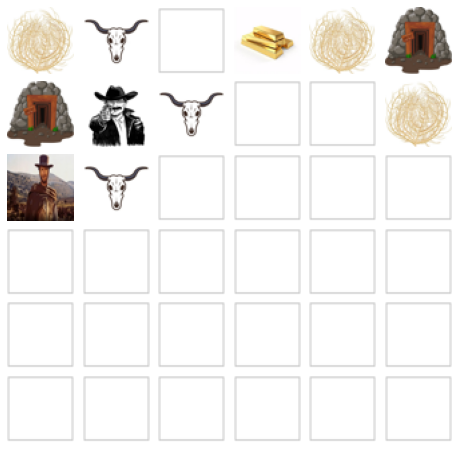

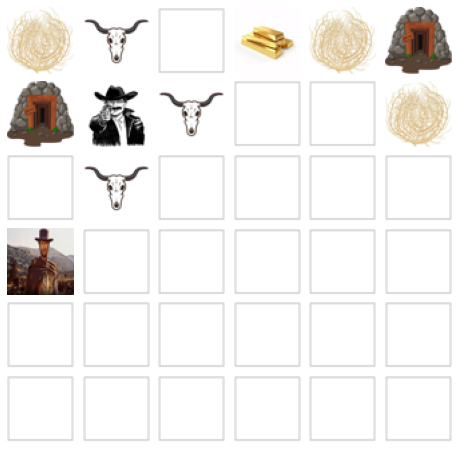

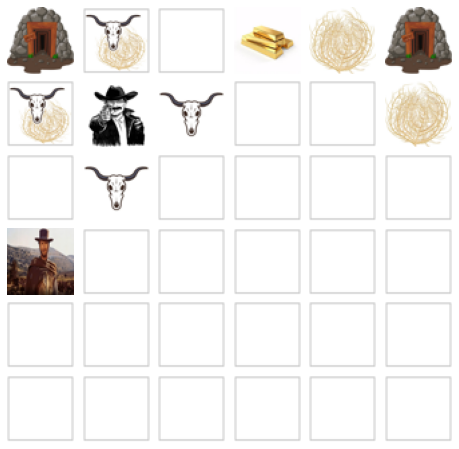

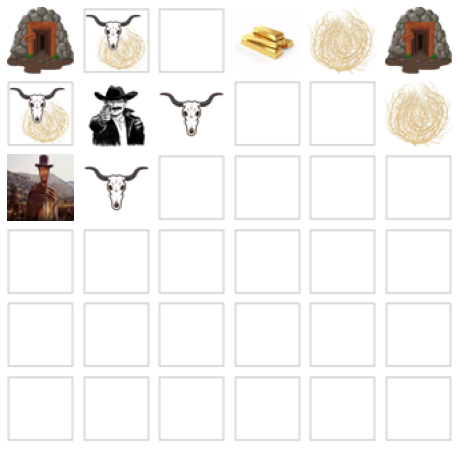

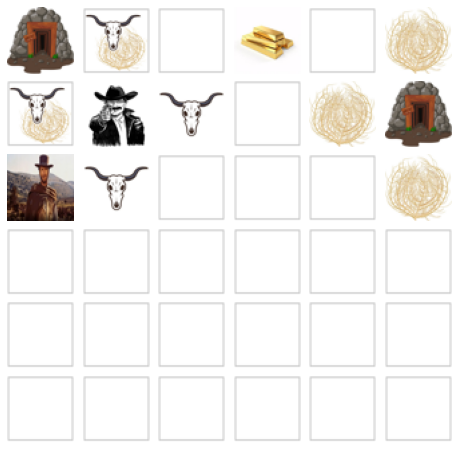

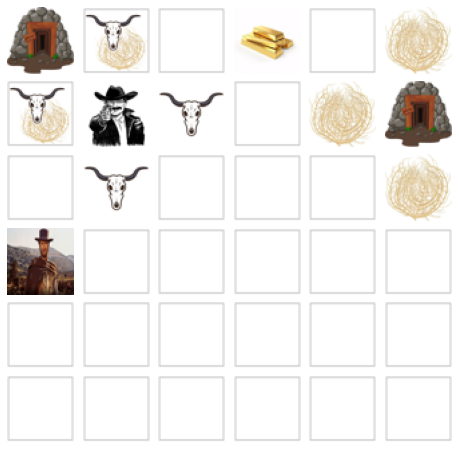

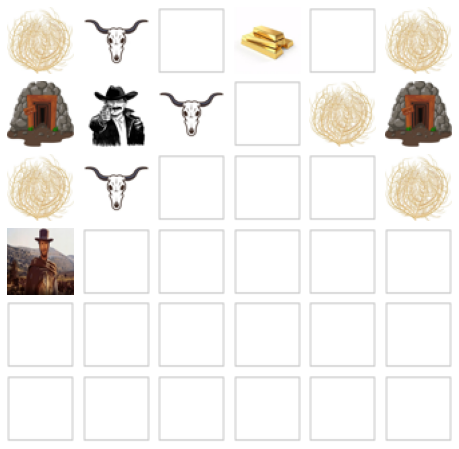

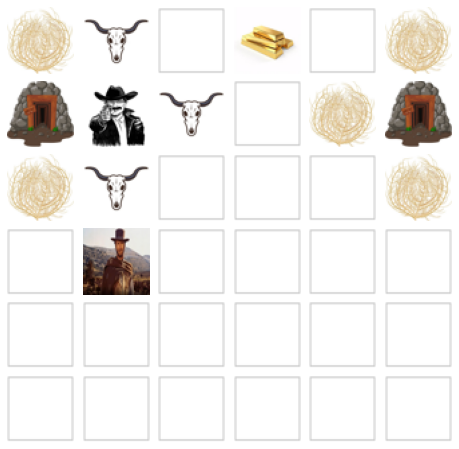

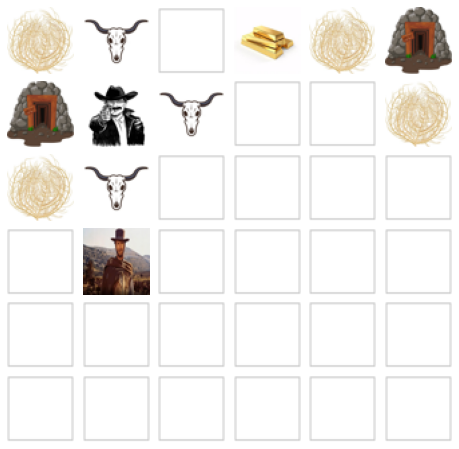

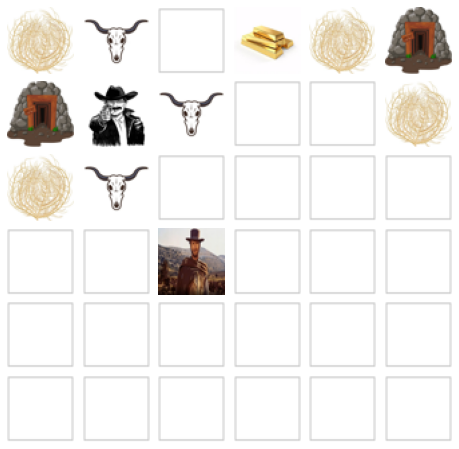

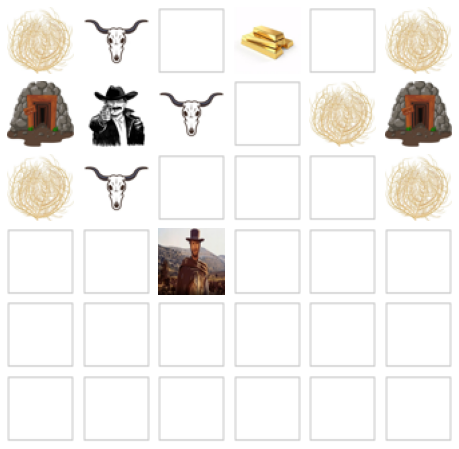

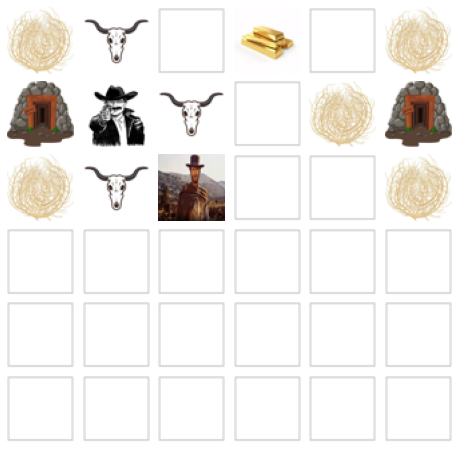

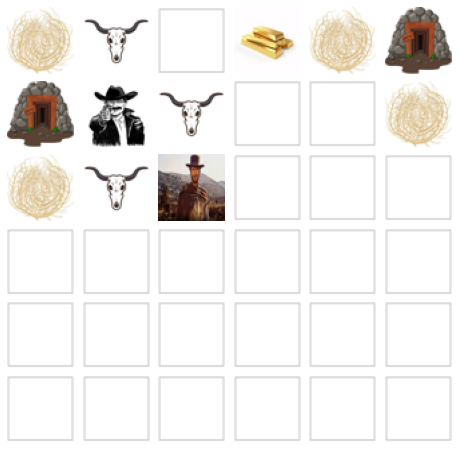

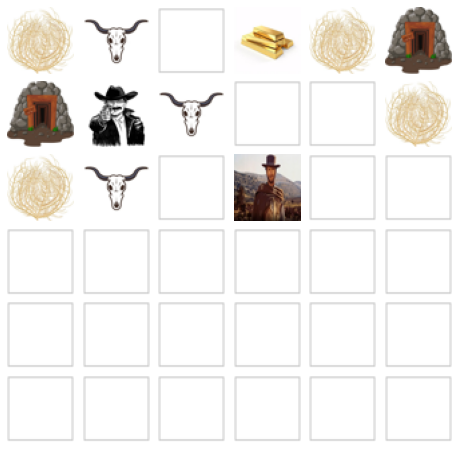

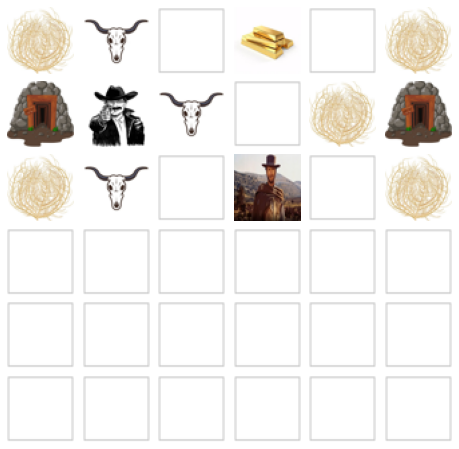

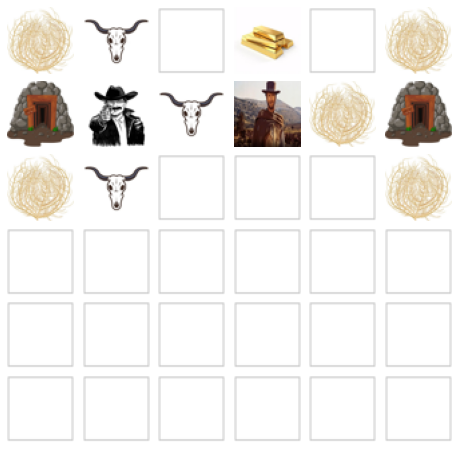

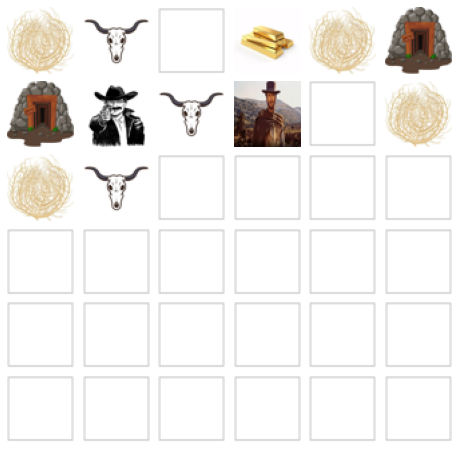

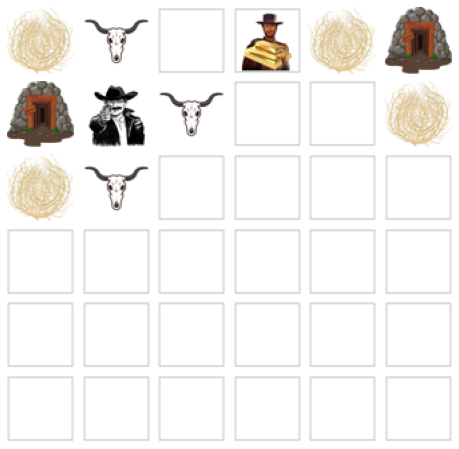

In [6]:

matriz_inicial = [
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0], 
]

todos_los_estados =[]

# Inicio del juego
print( "--------- !!!!!!!BIENVENIDO AL JUEGO WUMPUS!!!!!!!!! ---------")
print("Autor Pablo Velasco Martin")
print(" ")
print(" ")

# Crear el tablero inicial
print("Este es el tablero inicial")
tablero1 = Tablerowumpus(matriz_inicial)
tablero1.colocar()
#print (tablero1)
tablero1.vecinos()

imprimir_tablero_con_imagenes(tablero1)


print(" LA PARTIDA VA A COMENZAR EN BREVES INSTANTES.....")
time.sleep(4)
clear_output(wait=True) 



todos_los_estados.append(deepcopy(tablero1))
    
tableroEmpezar = tablero1

control = True
disparo = 0
muerto = False
    
while control:

    nuevoTablero, utility, stop  = iniciarMinimax(tableroEmpezar,2)
    
    
    todos_los_estados.append(deepcopy(nuevoTablero))
    
    if nuevoTablero.isGameOver()== True:
    
        control = False 
        mostrar_Juego(todos_los_estados)
        
        print("!!!!!! HAS GANADO LA PARTIDA !!!!!!")
        print("------------------------------ AQUI TIENES LA PARTIDA JUGADA ----------------------------")
        for estado in todos_los_estados:
            imprimir_tablero_con_imagenes(estado)
            

    else:
        
        disparo += 1

        if disparo == 3:
            
            tableros_disparo = deepcopy(nuevoTablero.disparo_aleatorio())
            
            #muerto= False
            for tablero in tableros_disparo:
                
                todos_los_estados.append(deepcopy(tablero))
                
                for fila in tablero.matrix:
                    for numero in fila:
                       
                        if numero == 32:  #ha disparado al wumpus
                            muerto=True
                    
        if muerto == False:  # Continuar solo si no debemos salir
            
            tableroJ2 = deepcopy(nuevoTablero.moverHoyo())
            todos_los_estados.append(deepcopy(tableroJ2))
            
            tableroEmpezar = tableroJ2
            
        else:
            
            mostrar_Juego(todos_los_estados)

            print("!!!!!! HAS MATADO AL WUMPUS !!!!!!")
            print("------------------------------ AQUI TIENES LA PARTIDA JUGADA ----------------------------")
            
            for estado in todos_los_estados:
                imprimir_tablero_con_imagenes(estado)

            break
#------------------------------------------------------------------------------------------------------------------------------           


                                                #SALIDA JUEGO WUMPUS
                                           #KERNEL-----> Restart & Run ALL
        
                       #primero mostrara el tablero inical y luego pasara a reproducirse el juego
                # Una vez terminado te enseñara todos los estados intermedios por los que ha pasado el juego


#-------------------------------------------------------------------------------------------------------------------------------